In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import json
import re
import ast
import statsmodels.api as sm
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima.utils import ndiffs
import scipy.optimize as opt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

warnings.simplefilter(action='ignore', category=FutureWarning)

In [162]:
for product in cleaned_theos.keys():



,timestamp,theo_price,imc_theo,return_theo,return_mtm
0,0,9999.536234,NaN,4.681017e-05,NaN
1,100,10000.004314,NaN,-4.314040e-07,NaN
2,200,10000.000000,NaN,2.220446e-16,NaN
3,300,10000.000000,NaN,-3.330669e-16,NaN
4,400,10000.000000,NaN,-1.773522e-05,NaN
5,500,9999.822648,NaN,7.748494e-05,NaN
6,600,10000.597483,NaN,-5.974477e-05,NaN
7,700,10000.000000,NaN,0.000000e+00,NaN
8,800,10000.000000,NaN,0.000000e+00,NaN
9,900,10000.000000,NaN,0.000000e+00,NaN


C:\Users\marco\AppData\Local\Temp\ipykernel_11744\3748193244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_theos[product]['return_theo'] = cleaned_theos[product]['theo_price'].pct_change().shift(-1).fillna(0)
C:\Users\marco\AppData\Local\Temp\ipykernel_11744\3748193244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_theos[product]['return_mtm'] = (cleaned_theos[product]['imc_theo'].shift(-1) / cleaned_theos[product]['theo_price']) - 1


,timestamp,theo_price,imc_theo,return_theo,return_mtm
0,0,2026.835940,NaN,0.000159,NaN
1,100,2027.157631,NaN,-0.000289,NaN
2,200,2026.571429,NaN,0.000255,NaN
3,300,2027.087804,NaN,-0.000290,NaN
4,400,2026.500000,NaN,0.000000,NaN
5,500,2026.500000,NaN,0.000125,NaN
6,600,2026.753730,NaN,-0.000369,NaN
7,700,2026.004953,NaN,-0.000551,NaN
8,800,2024.889004,NaN,0.000302,NaN
9,900,2025.500000,NaN,-0.000085,NaN


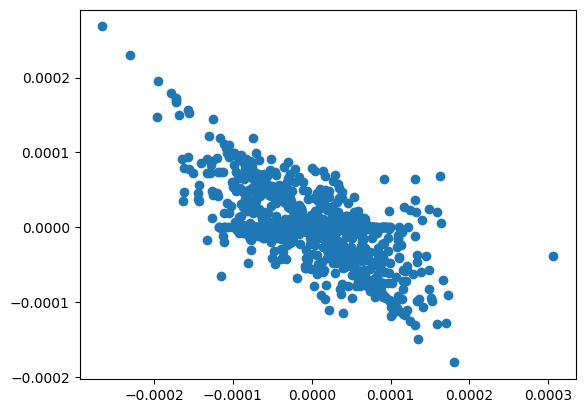

C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1999
Model:                 ARIMA(1, 0, 1)   Log Likelihood               17518.609
Date:                Thu, 13 Mar 2025   AIC                         -35029.218
Time:                        20:49:04   BIC                         -35006.816
Sample:                             0   HQIC                        -35020.992
                               - 1999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.77e-07   8.77e-07      0.316      0.752   -1.44e-06       2e-06
ar.L1          0.0198   2.86e-15   6.91e+12      0.000       0.020       0.020
ma.L1          0.0028    1.7e-14   1.62e+11      0.0

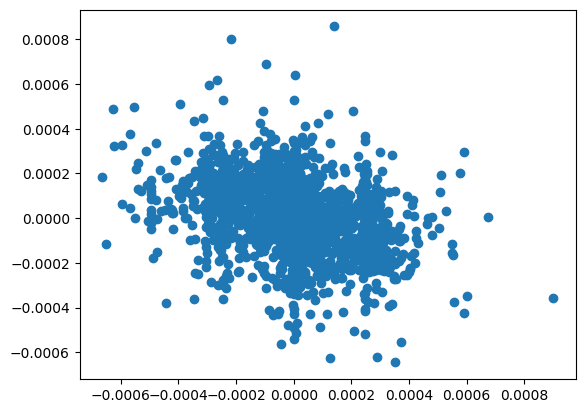

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1999
Model:                 ARIMA(0, 0, 1)   Log Likelihood               14621.763
Date:                Thu, 13 Mar 2025   AIC                         -29237.526
Time:                        20:49:07   BIC                         -29220.725
Sample:                             0   HQIC                        -29231.357
                               - 1999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.543e-06    3.7e-06      0.957      0.339   -3.71e-06    1.08e-05
ma.L1          0.0268      0.019      1.375      0.169      -0.011       0.065
sigma2      2.596e-08   6.19e-10     41.947      0.0

C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [146]:
arima_betas = {}
arima_signal_return_correlation = {}

for product in cleaned_theos.keys():

    X, y = har_all_features(cleaned_theos[product]['theo_price'].pct_change().fillna(0), lags=[i for i in range(1, 2)], window_y=1)

    return_mtm = (cleaned_theos[product]['imc_theo'].shift(-1) / cleaned_theos[product]['theo_price']) - 1

    y = return_mtm[:-1].fillna(0)
    plt.scatter(X, y)#.shift(1))
    plt.show()

    if product == 'RAINFOREST_RESIN':
        model1 = ARIMA(y, order=(1, 0, 1))
    else:  
        model1 = ARIMA(y, order=(0, 0, 1))

    result1 = model1.fit()
    print(result1.summary())
    # After fitting your model
    y_pred = result1.predict()
    y_mean = y.mean()
    ss_total = sum((y - y_mean) ** 2)
    ss_residual = sum(result1.resid ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f"R-squared: {r_squared}")


    ar_params = np.array(result1.arparams)
    if hasattr(result1, 'maparams'):
        ma_params = np.array(result1.maparams)
    else:
        ma_params = np.array([])

    arima_betas[product] = (ar_params, ma_params)
    
    arima_signal_return_correlation[product] = r_squared ** 0.5

print(arima_betas)
print(arima_signal_return_correlation)


In [3]:
def weighted_midprice(df, levels=1, quantity_power = 1):
    def calculate_weighted_midprice(row, levels, quantity_power):
        bid_side = []
        ask_side = []
        
        for level in range(1, levels + 1):
            bid_price = row.get(f'bid_price_{level}', np.nan)
            bid_volume = row.get(f'bid_volume_{level}', np.nan) ** quantity_power
            ask_price = row.get(f'ask_price_{level}', np.nan)
            ask_volume = row.get(f'ask_volume_{level}', np.nan) ** quantity_power
            
            if np.isfinite(bid_price) and np.isfinite(bid_volume) and bid_volume > 0:
                bid_side.append((bid_price, bid_volume))
            if np.isfinite(ask_price) and np.isfinite(ask_volume) and ask_volume > 0:
                ask_side.append((ask_price, ask_volume))
        
        if not bid_side or not ask_side:
            return np.nan
        
        total_bid_weight = sum(volume for _, volume in bid_side)
        total_ask_weight = sum(volume for _, volume in ask_side)
        
        weighted_bid_price = sum(price * volume for price, volume in bid_side) / total_bid_weight if total_bid_weight > 0 else np.nan
        weighted_ask_price = sum(price * volume for price, volume in ask_side) / total_ask_weight if total_ask_weight > 0 else np.nan
        
        return (weighted_bid_price + weighted_ask_price) / 2 if np.isfinite(weighted_bid_price) and np.isfinite(weighted_ask_price) else np.nan
    
    return df.apply(lambda row: calculate_weighted_midprice(row, levels, quantity_power), axis=1)

def har_all_features(X, lags, window_y=1):
    df = pd.DataFrame(X.T)
    
    # Calculate lag features (unchanged from your original code)
    lag_features = np.zeros((df.shape[0], len(lags) * df.shape[1]))
    for i, lag in enumerate(lags):
        start_ind = i * df.shape[1]
        end_ind = (i + 1) * df.shape[1]
        if i == 0:
            lag_features[:, start_ind : end_ind] = df.rolling(lag).mean().shift(1).to_numpy()
        else:
            prev_lag = lags[i-1]  # Previous lag boundary
            lag_features[:, start_ind:end_ind] = (
                df.rolling(lag).sum().shift(1).to_numpy() - df.rolling(prev_lag).sum().shift(1).to_numpy()
            ) / (lag - prev_lag)
    
    # For features_y, calculate forward-looking averages
    features_y = np.zeros_like(df.values)
    for i in range(len(df) - window_y + 1):
        # For each eligible row, compute average of current and next window_y-1 values
        features_y[i] = df.iloc[i:i+window_y].mean().values
    
    # Set valid range accounting for both lags and forward window
    start_idx = max(lags)
    end_idx = len(df) - window_y + 1
    
    # Return only the valid range
    return lag_features[start_idx:end_idx], features_y[start_idx:end_idx]



def har_all_features_var(X, lags, window_y=1):
    df = pd.DataFrame(X.T)
    
    # Calculate lag features (unchanged from your original code)
    lag_features = np.zeros((df.shape[0], len(lags) * df.shape[1]))
    for i, lag in enumerate(lags):
        start_ind = i * df.shape[1]
        end_ind = (i + 1) * df.shape[1]
        if i == 0:
            lag_features[:, start_ind : end_ind] = df.pow(2).rolling(lag).mean().shift(1).to_numpy()
        else:
            prev_lag = lags[i-1]  # Previous lag boundary
            lag_features[:, start_ind:end_ind] = (
                df.pow(2).rolling(lag).sum().shift(1).to_numpy() - df.pow(2).rolling(prev_lag).sum().shift(1).to_numpy()
            ) / (lag - prev_lag)
    
    # For features_y, calculate forward-looking averages
    features_y = np.zeros_like(df.values)
    for i in range(len(df) - window_y + 1):
        # For each eligible row, compute average of current and next window_y-1 values
        features_y[i] = df.iloc[i:i+window_y].pow(2).mean().values
    
    # Set valid range accounting for both lags and forward window
    start_idx = max(lags)
    end_idx = len(df) - window_y + 1
    
    # Return only the valid range
    return lag_features[start_idx:end_idx], features_y[start_idx:end_idx]


In [118]:
df['weighted_midprice_level_1'] = weighted_midprice(df, levels=1, quantity_power = 1)
df['weighted_midprice_level_2'] = weighted_midprice(df, levels=2, quantity_power = 1)
df['weighted_midprice_level_3'] = weighted_midprice(df, levels=3, quantity_power = 1)

df['return_l1'] = df.groupby('product')['weighted_midprice_level_1'].transform(lambda x: x.pct_change().fillna(0))
df['return_l2'] = df.groupby('product')['weighted_midprice_level_2'].transform(lambda x: x.pct_change().fillna(0))
df['return_l3'] = df.groupby('product')['weighted_midprice_level_3'].transform(lambda x: x.pct_change().fillna(0))



lags_realized_vol = [5, 10, 20]

for lag in lags_realized_vol:
    df[f'realized_vol_lag_{lag}'] = df.groupby('product')[return_optimize].transform(lambda x: x.pow(2).rolling(window=lag, min_periods=lag).mean().pow(0.5))

har_betas = {}
har_signal_return_correlation = {}

arima_betas = {}
arima_signal_return_correlation = {}

n_cv = 5

for product in df['product'].unique():

    # fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    # plot_acf(y, ax=axes[0], lags=20)
    # plot_pacf(y, ax=axes[1], lags=20)
    # plt.show()


    # pacf_vals, confint = pacf(y, nlags=20, alpha=0.05)

    # # Loop over lags starting at 1 (lag 0 is always 1)
    # significant_lags = []
    # for lag in range(1, len(pacf_vals)):
    #     lower, upper = confint[lag]
    #     # If the PACF value is outside the confidence interval, it's significant
    #     if np.sign(lower) == np.sign(upper):
    #         significant_lags.append(lag)
    #     else:
    #         # Stop at the first non-significant lag
    #         break

    # X, y = har_all_features(df[df['product'] == product][return_optimize], lags=significant_lags, window_y=1)

    # y = y.ravel()

    # scaler = StandardScaler()

    # X_scaled = scaler.fit_transform(X)

    # X_mean = scaler.mean_
    # X_std = scaler.scale_

    # ridge = RidgeCV(cv=n_cv, alphas=np.logspace(-8, 3, 100)).fit(X_scaled, y)
    # lasso = LassoCV(cv=n_cv, alphas=np.logspace(-8, 3, 100)).fit(X_scaled, y)
    # ols = sm.OLS(y, sm.add_constant(X_scaled)).fit()

    # best_alpha_ridge = ridge.alpha_
    # best_alpha_lasso = lasso.alpha_

    # r_squared_lasso = lasso.score(X_scaled, y)
    # r_squared_ridge = ridge.score(X_scaled, y)
    # r_squared_ols = ols.rsquared

    # # Get scaled coefficients
    # lasso_coef_scaled = lasso.coef_
    # ridge_coef_scaled = ridge.coef_

    # # Rescale coefficients to original scale
    # lasso_coef_original = lasso_coef_scaled / X_std  # Rescale slopes
    # ridge_coef_original = ridge_coef_scaled / X_std

    # # Adjust intercept for original scale
    # lasso_intercept_original = lasso.intercept_ - np.sum(lasso_coef_scaled * X_mean / X_std)
    # ridge_intercept_original = ridge.intercept_ - np.sum(ridge_coef_scaled * X_mean / X_std)

    # # Extract scaled OLS coefficients
    # ols_intercept_scaled = ols.params[0]
    # ols_coef_scaled = ols.params[1:]

    # # Rescale OLS coefficients
    # ols_coef_original = ols_coef_scaled / X_std  # Rescale slopes
    # ols_intercept_original = ols_intercept_scaled - np.sum(ols_coef_scaled * X_mean / X_std)
    
    # # Combine intercept and rescaled coefficients
    # coef_names = ['Constant'] + [f'Lag_{lag}' for lag in significant_lags]

    # # Select model type
    # ridge_coef_values = np.hstack(([ridge_intercept_original], ridge_coef_original))
    # lasso_coef_values = np.hstack(([lasso_intercept_original], lasso_coef_original))
    # ols_coef_values = np.hstack(([ols_intercept_original], ols_coef_original))
    
    # # Print summary

    # coef_values = np.vstack((lasso_coef_values, 
    #            ridge_coef_values, 
    #            ols_coef_values))
    
    # r2_values = np.array([r_squared_lasso, r_squared_ridge, r_squared_ols]).reshape(3, 1)
    # best_alpha_values = np.array([best_alpha_lasso, best_alpha_ridge, 0]).reshape(3, 1)

    # regression_df = pd.DataFrame(np.hstack((coef_values, r2_values, best_alpha_values)))
    # regression_df.columns = coef_names + ['R-squared'] + ['Alpha']
    # regression_df.index = ['LASSO', 'RIDGE', 'OLS']
            
    # # print(f"Product: {product}")
    # # display(regression_df)

    # if r_squared_lasso > r_squared_ridge:
    #     har_betas[product] = lasso_coef_values
    #     har_signal_return_correlation[product] = r_squared_lasso ** 0.5
    # else:
    #     har_betas[product] = ridge_coef_values
    #     har_signal_return_correlation[product] = r_squared_ridge ** 0.5

    X, y = har_all_features(df[df['product'] == product][return_optimize], lags=[i for i in range(1, 2)], window_y=1)

    model1 = ARIMA(y, order=(1, 0, 1))
    result1 = model1.fit()
    print(result1.summary())
    # After fitting your model
    y_pred = result1.predict()
    y_mean = y.mean()
    ss_total = sum((y - y_mean) ** 2)
    ss_residual = sum(result1.resid ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f"R-squared: {r_squared}")


    ar_params = np.array(result1.arparams)
    ma_params = np.array(result1.maparams)

    arima_betas[product] = (ar_params, ma_params)
    
    arima_signal_return_correlation[product] = r_squared ** 0.5

print(har_betas)
print(har_signal_return_correlation)

print(arima_betas)
print(arima_signal_return_correlation)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1999
Model:                 ARIMA(1, 0, 1)   Log Likelihood               15551.697
Date:                Thu, 13 Mar 2025   AIC                         -31095.394
Time:                        07:03:45   BIC                         -31072.992
Sample:                             0   HQIC                        -31087.168
                               - 1999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.225e-07   5.31e-07     -1.549      0.121   -1.86e-06    2.18e-07
ar.L1          0.0339   2.14e-13   1.58e+11      0.000       0.034       0.034
ma.L1         -0.7915   2.25e-12  -3.51e+11      0.0

C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [2]:
%%capture
!pip install jsonpickle

In [179]:
def parse_log_file(file_path):
    
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Extract sections
    sandbox_section = re.search(r'Sandbox logs:(.*?)Activities log:', content, re.DOTALL).group(1).strip()
    activities_section = re.search(r'Activities log:(.*?)Trade History:', content, re.DOTALL).group(1).strip()
    trade_section = re.search(r'Trade History:(.*?)$', content, re.DOTALL).group(1).strip()
    
    # Function to parse multi-line JSON objects
    def extract_json_objects(json_string):
        # Split the string into lines
        lines = json_string.strip().split('\n')
        
        # Initialize variables
        json_objects = []
        current_object = ""
        inside_object = False
        
        for idx, line in enumerate(lines):
            if line.strip().startswith('{'):
                inside_object = True
                current_object = line
            elif line.strip().endswith('}') and inside_object:
                current_object += line
                json_objects.append(json.loads(current_object))
                current_object = ""
                inside_object = False
            elif inside_object:
                current_object += line
        
        return json_objects
    
    # Parse each section
    sandbox_logs = extract_json_objects(sandbox_section)
    activities_list = pd.read_csv(StringIO(activities_section), sep=';')
    trade_list = ast.literal_eval(trade_section)

    sandbox_dicts = {}
    
    own_trades_df = pd.DataFrame(columns=['symbol', 'price', 'quantity', 'buyer', 'seller', 'timestamp'])

    market_trades_df = pd.DataFrame(columns=['symbol', 'price', 'quantity', 'buyer', 'seller', 'timestamp'])
    
    bid_df = pd.DataFrame(columns=['symbol','bid_price', 'bid_volume','timestamp'])
    ask_df = pd.DataFrame(columns=['symbol','ask_price', 'ask_volume','timestamp'])

    position_df = pd.DataFrame(columns=['symbol', 'position', 'timestamp'])

    trader_orders_df = pd.DataFrame(columns=['timestamp', 'symbol', 'price', 'quantity', 'type'])
    trader_data_df = pd.DataFrame(columns=['timestamp', 'symbol', 'midprice_theo', 'signal_theo', 'past_log_returns', 'past_residuals', 'expected_return'])

    timestamps  = list(range(0, 1 + (len(sandbox_logs) * 100), 100))

    market_trade_info_df = pd.DataFrame(columns=['timestamp', 'symbol', 'average_weighted_price', 'total_volume'])

    for idx_log, log in enumerate(sandbox_logs):

        try:
            lambda_log = log['lambdaLog']
            if "LATEST\n" in lambda_log and "\nEND" in lambda_log:
                start_idx = lambda_log.find("LATEST\n") + len("LATEST\n")
                end_idx = lambda_log.find("\nEND")
                
                json_content = lambda_log[start_idx:end_idx]
                parsed = json.loads(json_content)

            else:
                parsed = json.loads(lambda_log)

        except:

            print(log['lambdaLog'])
            raise Exception("Error parsing log")
        

        sandbox_dicts[parsed['state']['timestamp']] = parsed

        parsed_own_trades_df = pd.DataFrame(parsed['state']["own_trades"], columns=['symbol', 'price', 'quantity', 'buyer', 'seller', 'timestamp'])

        parsed_own_trades_df = parsed_own_trades_df[parsed_own_trades_df['timestamp']  == parsed['state']['timestamp']- 100]

        if parsed['state']['timestamp'] >= 7200 and parsed['state']['timestamp'] <= 7400:
            print(parsed['state']['timestamp'])
            display(parsed_own_trades_df)
        if not parsed_own_trades_df.empty:
            own_trades_df = pd.concat([own_trades_df, parsed_own_trades_df], ignore_index=True)
            
        parsed_market_trades_df = pd.DataFrame(parsed['state']["market_trades"], columns=['symbol', 'price', 'quantity', 'buyer', 'seller', 'timestamp'])
        
        parsed_market_trades_df = parsed_market_trades_df[parsed_market_trades_df['timestamp']  == parsed['state']['timestamp']- 100]

        # df_tuples = set(market_trades_df.astype(str).apply(tuple, axis=1))
        # df_add_tuples = set(parsed_market_trades_df.astype(str).apply(tuple, axis=1))
        # new_rows_tuples = df_add_tuples - df_tuples
        # mask = parsed_market_trades_df.astype(str).apply(tuple, axis=1).isin(new_rows_tuples)
        # new_rows = parsed_market_trades_df[mask]

        # if not new_rows.empty:
        #     market_trades_df = pd.concat([market_trades_df, new_rows], ignore_index=True)
        
        if not parsed_market_trades_df.empty:
            market_trades_df = pd.concat([market_trades_df, parsed_market_trades_df], ignore_index=True)
            
        for symbol, depth in parsed['state']['order_depths'].items():

            parsed_bid_df = pd.DataFrame(list(depth[0].items()), columns=['bid_price', 'bid_volume'])
            parsed_ask_df = pd.DataFrame(list(depth[1].items()), columns=['ask_price', 'ask_volume'])

            parsed_ask_df['ask_volume'] = np.abs(parsed_ask_df['ask_volume'])

            parsed_bid_df['symbol'] = symbol
            parsed_ask_df['symbol'] = symbol

            parsed_bid_df['timestamp'] = parsed['state']['timestamp']
            parsed_ask_df['timestamp'] = parsed['state']['timestamp']
            
            bid_df = pd.concat([bid_df, parsed_bid_df], ignore_index=True)
            ask_df = pd.concat([ask_df, parsed_ask_df], ignore_index=True)

        parsed_position_df = pd.DataFrame(list(parsed['state']['position'].items()), columns=['symbol', 'position'])

        parsed_position_df['timestamp'] = parsed['state']['timestamp']

        position_df = pd.concat([position_df, parsed_position_df], ignore_index=True)
        
        parsed_trader_data = json.loads(parsed['state']['trader_data'])

        orders_df = pd.DataFrame(columns = ['symbol', 'price', 'quantity', 'type', 'order_type','offset_asked'])

        symbol_list = list(parsed_trader_data['past_midprice_theos'].keys())
        past_info_df = pd.DataFrame({'symbol': symbol_list,
                                     'midprice_theo': [parsed_trader_data['past_midprice_theos'][symbol][-1] for symbol in symbol_list],
                                     'signal_theo': [parsed_trader_data['past_signal_theos'][symbol][-1] for symbol in symbol_list],
                                        'past_returns': [parsed_trader_data['past_returns'][symbol][-1] for symbol in symbol_list],
                                        'past_residuals': [parsed_trader_data['past_residuals'][symbol][-1] for symbol in symbol_list],
                                        'expected_return': [parsed_trader_data['expected_return'][symbol] for symbol in symbol_list]
                                        })
        
        past_info_df['timestamp'] = parsed['state']['timestamp']

        market_trade_info_df = pd.concat([market_trade_info_df, pd.DataFrame({'timestamp': parsed['state']['timestamp'],
                                             'symbol': list(parsed_trader_data['market_trades_data'].keys()),
                                             'average_weighted_price': [values['average_weighted_price'] for values in parsed_trader_data['market_trades_data'].values()],
                                             'total_volume': [values['total_volume'] for values in parsed_trader_data['market_trades_data'].values()],
                                        })], ignore_index=True)

        for symbol in parsed_trader_data['last_maker_orders'].keys():
            maker_orders_df = pd.DataFrame(parsed_trader_data['last_maker_orders'][symbol], columns=['symbol', 'price', 'quantity','offset_asked']) if len(parsed_trader_data['last_maker_orders'][symbol]) > 0 else pd.DataFrame(columns=['symbol', 'price', 'quantity','offset_asked'])

            taker_orders_df = pd.DataFrame(parsed_trader_data['last_taker_orders'][symbol], columns=['symbol', 'price', 'quantity']) if len(parsed_trader_data['last_taker_orders'][symbol]) > 0 else pd.DataFrame(columns=['symbol', 'price', 'quantity'])

            maker_orders_df['type'] = 'maker'
            taker_orders_df['type'] = 'taker'
            taker_orders_df['offset_asked'] = np.nan


            dfs_to_concat = [df for df in [orders_df, maker_orders_df, taker_orders_df] if not df.empty]
            if dfs_to_concat: 
                orders_df = pd.concat(dfs_to_concat, ignore_index=True)


        orders_df['timestamp'] = parsed['state']['timestamp']
    
        if not past_info_df.empty:
            trader_data_df = pd.concat([trader_data_df, past_info_df], ignore_index=True)
        if not orders_df.empty:
            trader_orders_df = pd.concat([trader_orders_df, orders_df], ignore_index=True)

    trader_data_df = trader_data_df.groupby('symbol').apply(
        lambda x: x.assign(**{'return': x['past_returns'].shift(-1)})
    ).sort_values('timestamp').drop('past_returns', axis=1).reset_index(drop=True)
    

    # own_trades_df = own_trades_df.drop_duplicates(subset=['symbol', 'timestamp'])

    market_trades_df = market_trades_df.sort_values('timestamp')
    
    symbols = position_df['symbol'].unique()

    result_dfs = []

    for symbol in symbols:
        symbol_data = position_df[position_df['symbol'] == symbol]

        symbol_all_times = pd.DataFrame({
                'symbol': symbol,
                'timestamp': timestamps
            })
        
        symbol_merged = pd.merge(symbol_all_times, symbol_data, 
                                    on=['symbol', 'timestamp'], how='left')
            
        symbol_merged = symbol_merged.sort_values('timestamp')
        symbol_merged['position'] = symbol_merged['position'].ffill().fillna(0).astype('float64')

        result_dfs.append(symbol_merged)

    position_df = pd.concat(result_dfs, ignore_index=True)

    activities_df, trade_history_df = pd.DataFrame(activities_list), pd.DataFrame(trade_list)

    # Conversion for market_trade_info_df
    market_trade_info_df['timestamp'] = market_trade_info_df['timestamp'].astype(int)
    market_trade_info_df['symbol'] = market_trade_info_df['symbol'].astype(str)
    market_trade_info_df['average_weighted_price'] = market_trade_info_df['average_weighted_price'].astype(float)
    market_trade_info_df['total_volume'] = market_trade_info_df['total_volume'].astype(int)

    # Conversion for trader_orders_df
    trader_orders_df['timestamp'] = trader_orders_df['timestamp'].astype(int)
    trader_orders_df['symbol'] = trader_orders_df['symbol'].astype(str)
    trader_orders_df['price'] = trader_orders_df['price'].astype(int)
    trader_orders_df['quantity'] = trader_orders_df['quantity'].astype(int)
    trader_orders_df['type'] = trader_orders_df['type'].astype(str)
    # offset_asked is already float64

    # Conversion for trader_data_df
    trader_data_df['timestamp'] = trader_data_df['timestamp'].astype(int)
    trader_data_df['symbol'] = trader_data_df['symbol'].astype(str)
    trader_data_df['midprice_theo'] = trader_data_df['midprice_theo'].astype(float)
    trader_data_df['signal_theo'] = trader_data_df['signal_theo'].astype(float)

    # Conversion for position_df
    position_df['symbol'] = position_df['symbol'].astype(str)
    position_df['timestamp'] = position_df['timestamp'].astype(int)
    # position is already float64

    # Conversion for bid_df
    bid_df['symbol'] = bid_df['symbol'].astype(str)
    bid_df['bid_price'] = bid_df['bid_price'].astype(int)
    bid_df['bid_volume'] = bid_df['bid_volume'].astype(int)
    bid_df['timestamp'] = bid_df['timestamp'].astype(int)

    # Conversion for ask_df
    ask_df['symbol'] = ask_df['symbol'].astype(str)
    ask_df['ask_price'] = ask_df['ask_price'].astype(int)
    ask_df['ask_volume'] = ask_df['ask_volume'].astype(int)
    ask_df['timestamp'] = ask_df['timestamp'].astype(int)

    # Conversion for own_trades_df
    own_trades_df['symbol'] = own_trades_df['symbol'].astype(str)
    # price is already float64
    own_trades_df['quantity'] = own_trades_df['quantity'].astype(int)
    own_trades_df['buyer'] = own_trades_df['buyer'].astype(str)
    own_trades_df['seller'] = own_trades_df['seller'].astype(str)
    own_trades_df['timestamp'] = own_trades_df['timestamp'].astype(int)

    # Conversion for market_trades_df
    market_trades_df['symbol'] = market_trades_df['symbol'].astype(str)
    # price is already float64
    market_trades_df['quantity'] = market_trades_df['quantity'].astype(int)
    market_trades_df['buyer'] = market_trades_df['buyer'].astype(str)
    market_trades_df['seller'] = market_trades_df['seller'].astype(str)
    market_trades_df['timestamp'] = market_trades_df['timestamp'].astype(int)

    # activities_df and trade_history_df appear to already have the correct types
    # But we'll convert 'product' in activities_df to str and currency/buyer/seller in trade_history_df
    activities_df['product'] = activities_df['product'].astype(str)

    trade_history_df['buyer'] = trade_history_df['buyer'].astype(str)
    trade_history_df['seller'] = trade_history_df['seller'].astype(str)
    trade_history_df['symbol'] = trade_history_df['symbol'].astype(str)
    trade_history_df['currency'] = trade_history_df['currency'].astype(str)

    return market_trade_info_df, trader_orders_df, trader_data_df, position_df, bid_df, ask_df, own_trades_df, market_trades_df,  pd.DataFrame(activities_list), pd.DataFrame(trade_list)


In [91]:
def build_position_trajectory_with_pnl(own_trades: pd.DataFrame) -> pd.DataFrame:
    trades_sorted = own_trades.sort_values(by="timestamp").copy()
    pos_records = [{
            "timestamp": 0,
            "product": product,
            "position": 0,
            "cost_basis": np.nan,
            "realized_pnl": np.nan,
            "realized_pnl_cum": np.nan,
        } for product in own_trades['symbol'].unique()]
    
    # Track state by product
    state = {}
    

    for _, row in trades_sorted.iterrows():
        product = row["symbol"]
        t = row["timestamp"]
        qty = row["quantity"]
        px = row["price"]
        
        # Determine if we're buying or selling
        if row["buyer"] == "SUBMISSION":
            delta_pos = +qty  # We're buying
        elif row["seller"] == "SUBMISSION":
            delta_pos = -qty  # We're selling
        else:
            continue  # Not our trade
        
        # Initialize state for this product if not seen before
        if product not in state:
            state[product] = {
                "pos": 0.0,
                "cost_basis": 0.0,
                "realized_cum": 0.0
            }
        
        old_pos = state[product]["pos"]
        old_cb = state[product]["cost_basis"]
        old_realized = state[product]["realized_cum"]
                
        # Determine if we're opening, increasing, reducing, or closing a position
        if abs(old_pos) < 1e-10:  # No existing position
        # Opening a new position
            new_pos = delta_pos
            new_cb = px
            trade_realized = 0.0
        elif (old_pos > 0 and delta_pos > 0) or (old_pos < 0 and delta_pos < 0):
            total_pos = old_pos + delta_pos
            new_cb = (old_pos * old_cb + delta_pos * px) / total_pos
            new_pos = total_pos
            trade_realized = 0.0
        elif (old_pos > 0 and delta_pos < 0) or (old_pos < 0 and delta_pos > 0):
            # Trade in opposite direction of position
            # First determine if we're reducing or flipping the position
            if abs(delta_pos) <= abs(old_pos):
                # Reducing position
                trade_realized = -delta_pos * (px - old_cb) if old_pos > 0 else delta_pos * (old_cb - px)
                
                new_pos = old_pos + delta_pos
                new_cb = old_cb  # Cost basis stays the same when reducing
            else:

                # Flipping position (close existing and open new in opposite direction)
                # Calculate PnL on the closed portion

                trade_realized = old_pos * (px - old_cb) if old_pos > 0 else -old_pos * (old_cb - px)
                # # Remaining quantity becomes a new position
                new_pos = old_pos + delta_pos
                new_cb = px  # New cost basis is this trade's price
            

        # Update cumulative realized PnL
        new_realized_cum = old_realized + trade_realized
        
        # Clean up tiny values due to floating point issues
        if abs(new_pos) < 1e-10:
            new_pos = 0.0
            new_cb = 0.0
        
        # Update state
        state[product]["pos"] = new_pos
        state[product]["cost_basis"] = new_cb
        state[product]["realized_cum"] = new_realized_cum
        
        # Record this position update
        pos_records.append({
            "timestamp": t + 100,
            "product": product,
            "position": new_pos,
            "cost_basis": new_cb,
            "realized_pnl": trade_realized,
            "realized_pnl_cum": new_realized_cum
        })
    
    # Create DataFrame from records
    position_df = pd.DataFrame(pos_records)
    
    # Ensure we keep only the last record for each product/timestamp combination
    position_df = (
        position_df
        .sort_values(["product", "timestamp"])
        .groupby(["product", "timestamp"], as_index=False)
        .last()
    )
    
    return position_df

In [92]:
def calculate_theo_for_row(row: pd.Series, betas: tuple) -> float:

    second_level_weight, third_level_weight, own_trades_weight, market_trades_weight = betas

    bid_levels = []

    if pd.notna(row["bid_price_1"]) and pd.notna(row["bid_volume_1"]) and row["bid_volume_1"]>0:
        vol_scaled = row["bid_volume_1"]
        bid_levels.append((row["bid_price_1"], vol_scaled))

    if pd.notna(row["bid_price_2"]) and pd.notna(row["bid_volume_2"]) and row["bid_volume_2"]>0:
        vol_scaled = row["bid_volume_2"] * second_level_weight
        bid_levels.append((row["bid_price_2"], vol_scaled))

    if pd.notna(row["bid_price_3"]) and pd.notna(row["bid_volume_3"]) and row["bid_volume_3"]>0:
        vol_scaled = row["bid_volume_3"] * third_level_weight
        bid_levels.append((row["bid_price_3"], vol_scaled))

    if len(bid_levels) == 0:
        return np.nan

    total_bid_vol = sum(x[1] for x in bid_levels)
    weighted_bid  = sum(x[0]*x[1] for x in bid_levels) / total_bid_vol

    ask_levels = []

    if pd.notna(row["ask_price_1"]) and pd.notna(row["ask_volume_1"]) and row["ask_volume_1"]>0:
        vol_scaled = row["ask_volume_1"]
        ask_levels.append((row["ask_price_1"], vol_scaled))

    if pd.notna(row["ask_price_2"]) and pd.notna(row["ask_volume_2"]) and row["ask_volume_2"]>0:
        vol_scaled = row["ask_volume_2"] * second_level_weight
        ask_levels.append((row["ask_price_2"], vol_scaled))

    if pd.notna(row["ask_price_3"]) and pd.notna(row["ask_volume_3"]) and row["ask_volume_3"]>0:
        vol_scaled = row["ask_volume_3"] * third_level_weight
        ask_levels.append((row["ask_price_3"], vol_scaled))

    if len(ask_levels) == 0:
        return np.nan

    total_ask_vol = sum(x[1] for x in ask_levels)
    weighted_ask  = sum(x[0]*x[1] for x in ask_levels) / total_ask_vol

    own_volume = row['own_volume'] * own_trades_weight
    market_volume = row['market_volume'] * market_trades_weight
    own_weighted_average_price = row['own_average_price'] * own_volume if own_volume > 0 else 0
    market_weighted_average_price = row['market_average_price'] * market_volume if market_volume > 0 else 0

    denom = total_bid_vol + total_ask_vol + own_volume + market_volume
    if denom < 1e-9:
        return np.nan
    
    p_micro = ((weighted_ask * total_bid_vol) + (weighted_bid * total_ask_vol) + own_weighted_average_price + market_weighted_average_price) / denom

    return p_micro

In [187]:
bid_df[bid_df['timestamp'] == 100000].head()

,symbol,bid_price,bid_volume,timestamp
3120,KELP,2018,24,100000
3121,RAINFOREST_RESIN,9996,1,100000
3122,RAINFOREST_RESIN,9995,23,100000


In [93]:
def compute_predicted_pnl(
    position_steps: pd.DataFrame,
    activities_df: pd.DataFrame,
    own_trades: pd.DataFrame,
    betas: tuple
) -> pd.DataFrame:

    act_df = activities_df.copy()

    act_df = act_df.sort_values(["product", "timestamp"], ascending=[True, True])
    position_steps = position_steps.sort_values(["product", "timestamp"], ascending=[True, True])

    merged = pd.merge(
        act_df,
        position_steps,
        on=["product","timestamp"],
        how = "left"
    )

    merged["position"]   = merged["position"].ffill().fillna(0.0)
    merged["cost_basis"] = merged["cost_basis"].ffill().fillna(0.0)
    merged["realized_pnl"] = merged["realized_pnl"].ffill().fillna(0.0)
    merged["realized_pnl_cum"] = merged["realized_pnl_cum"].ffill().fillna(0.0)

    merged["theo_price"] = merged.apply(lambda r: calculate_theo_for_row(r, betas), axis=1)

    merged["imc_theo"] =  merged['cost_basis'] + ((merged['profit_and_loss'] - merged['realized_pnl_cum']) / merged['position'])

    return merged 

In [114]:
def mse_pnl(position_steps, activities_df, own_trades, betas, verbose=False):

    df = compute_predicted_pnl(position_steps, activities_df, own_trades, betas)

    df['imc_theo'].replace([np.inf, -np.inf], np.nan, inplace=True)

    df['imc_theo'] = df['imc_theo'].ffill()

    df["error_theo"] = df["imc_theo"] - df["theo_price"]

    if verbose:
        print(betas)

    mse = (df[~np.isnan(df['error_theo'])]["error_theo"]**2).mean()
    return df, mse

In [180]:
# log_file_path = "C://Users//marco//Downloads//36e91c55-e5ad-4647-bb52-434d72dbe949.log"
log_file_path = "C://Users//marco//Downloads//6d902f9a-0384-4028-bd0a-5d7f80eb878c.log" # MOST RECENT

market_trade_info_df, trader_orders_df, trader_data_df, position_df, bid_df, ask_df, own_trades_df, market_trades_df,  activities_df, trade_history_df = parse_log_file(log_file_path)

7200


,symbol,price,quantity,buyer,seller,timestamp


7300


,symbol,price,quantity,buyer,seller,timestamp


7400


,symbol,price,quantity,buyer,seller,timestamp
0,RAINFOREST_RESIN,10002.0,1,,SUBMISSION,7300
1,RAINFOREST_RESIN,10002.0,2,,SUBMISSION,7300
2,KELP,2026.0,2,,SUBMISSION,7300


C:\Users\marco\AppData\Local\Temp\ipykernel_11744\4066270400.py:171: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trader_data_df = trader_data_df.groupby('symbol').apply(


In [97]:

market_info_df = (
    market_trades_df
    .groupby(["symbol", "timestamp"])
    .apply(lambda g: pd.Series({
        "market_average_price": (g["price"] * g["quantity"]).sum() / g["quantity"].sum(),
        "market_volume": g["quantity"].sum()
    }))
    .reset_index()
)

own_info_df = (
    own_trades_df
    .groupby(["symbol", "timestamp"])
    .apply(lambda g: pd.Series({
        "own_average_price": (g["price"] * g["quantity"]).sum() / g["quantity"].sum(),
        "own_volume": g["quantity"].sum()
    }))
    .reset_index()
)


C:\Users\marco\AppData\Local\Temp\ipykernel_11744\1428740748.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({
C:\Users\marco\AppData\Local\Temp\ipykernel_11744\1428740748.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [98]:
symbols = own_trades_df['symbol'].unique()

result_dfs = []

timestamps = list(range(0, 200001, 100))

position_df = build_position_trajectory_with_pnl(own_trades_df)

for symbol in symbols:
    symbol_data = position_df[position_df['product'] == symbol]

    symbol_all_times = pd.DataFrame({
            'product': symbol,
            'timestamp': timestamps
        })
    
    symbol_merged = pd.merge(symbol_all_times, symbol_data, 
                                on=['product', 'timestamp'], how='left')
        
    symbol_merged = symbol_merged.sort_values('timestamp')
    symbol_merged['position'] = symbol_merged['position'].ffill().fillna(0).astype('float64')

    result_dfs.append(symbol_merged)

position_df = pd.concat(result_dfs, ignore_index=True)



In [ ]:
def objective(betas, product, verbose=False):

    _, mse_val = mse_pnl(
        position_df[position_df['product'] == product],
        activities_df[activities_df['product'] == product],
        own_trades_df[own_trades_df['symbol'] == product],
        betas,
        verbose=verbose
    )
    return mse_val


betas = {}
cleaned_theos = {}

for product in position_df['product'].unique():
    init_guess = (1, 1, 1, 1)

    bounds = [(0, 2)]*4

    init_mse = objective(init_guess, product, verbose=False)

    from functools import partial
    product_objective = partial(objective, product=product, verbose=False)
    
    # Use Nelder-Mead or your preferred method
    result = opt.minimize(
        product_objective,
        x0=init_guess,
        method='SLSQP',  # or "TNC", "SLSQP", etc. -- must be a method that supports bounds
        bounds=bounds,
        options={"eps": 1e-4}
    )

    mse_df, mse_val = mse_pnl(
        position_df[position_df['product'] == product],
        activities_df[activities_df['product'] == product],
        own_trades_df[own_trades_df['symbol'] == product],
        result.x,
        verbose=False
    )


    cleaned_theos[product] = mse_df[['timestamp', 'theo_price','imc_theo']]

    cleaned_theos[product]['return_theo'] = cleaned_theos[product]['theo_price'].pct_change().shift(-1).fillna(0)
    cleaned_theos[product]['return_mtm'] = (cleaned_theos[product]['imc_theo'].shift(-1) / cleaned_theos[product]['theo_price']) - 1


    print(f"Optimization result for product {product}:", result)
    print(f"Best betas for product {product}:", result.x)
    print(f"Initial MSE for product {product}:", init_mse)
    print(f"MSE for product {product}:", result.fun)
    betas[product] = result.x

C:\Users\marco\AppData\Local\Temp\ipykernel_11744\4276787321.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_theos[product]['return_theo'] = cleaned_theos[product]['theo_price'].pct_change().shift(-1).fillna(0)
C:\Users\marco\AppData\Local\Temp\ipykernel_11744\4276787321.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_theos[product]['return_mtm'] = (cleaned_theos[product]['imc_theo'].shift(-1) / cleaned_theos[product]['theo_price']) - 1


Optimization result for product RAINFOREST_RESIN:  message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.14391734930832842
       x: [ 8.564e-01  6.123e-01  5.808e-01  4.500e-02]
     nit: 22
     jac: [-1.606e-05  1.012e-05  2.430e-05 -1.099e-05]
    nfev: 111
    njev: 22
Best betas for product RAINFOREST_RESIN: [0.85641534 0.61227611 0.58079727 0.0450033 ]
Initial MSE for product RAINFOREST_RESIN: 0.23816790195574122
MSE for product RAINFOREST_RESIN: 0.14391734930832842
Optimization result for product KELP:  message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.04145384883900474
       x: [ 8.726e-01  7.120e-01  4.101e-01  1.467e-01]
     nit: 18
     jac: [-1.055e-05 -2.337e-05  1.836e-04 -1.306e-04]
    nfev: 90
    njev: 18
Best betas for product KELP: [0.8725848  0.71203151 0.41013304 0.14665224]
Initial MSE for product KELP: 0.0471294262577646
MSE for product KELP: 0.04145384883900474


C:\Users\marco\AppData\Local\Temp\ipykernel_11744\4276787321.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_theos[product]['return_theo'] = cleaned_theos[product]['theo_price'].pct_change().shift(-1).fillna(0)
C:\Users\marco\AppData\Local\Temp\ipykernel_11744\4276787321.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_theos[product]['return_mtm'] = (cleaned_theos[product]['imc_theo'].shift(-1) / cleaned_theos[product]['theo_price']) - 1


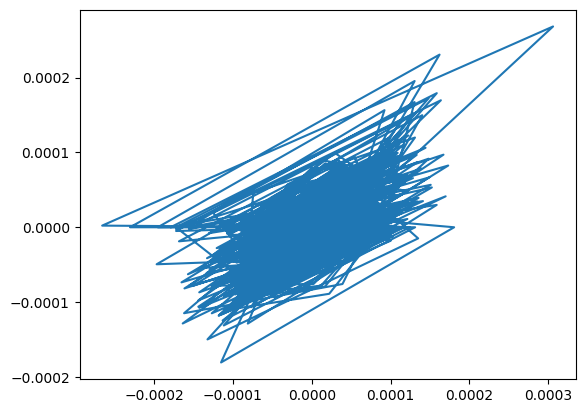

In [177]:
product = 'RAINFOREST_RESIN'

plt.plot(cleaned_theos[product]['return_theo'].shift(-1), cleaned_theos[product]['return_mtm'])
plt.show()

In [127]:
betas

{'RAINFOREST_RESIN': array([0.85641534, 0.61227611, 0.58079727, 0.0450033 ]),
 'KELP': array([0.8725848 , 0.71203151, 0.41013304, 0.14665224])}

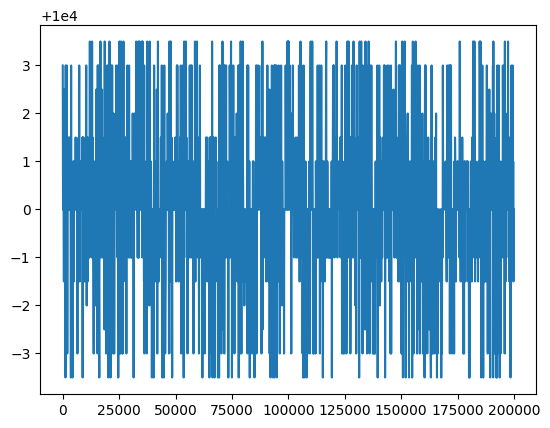

In [123]:
product_mask = activities_df['product'] == 'RAINFOREST_RESIN'

plt.plot(activities_df[product_mask]['timestamp'], activities_df[product_mask]['mid_price'])
plt.show()


In [126]:
df.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss'],
      dtype='object')

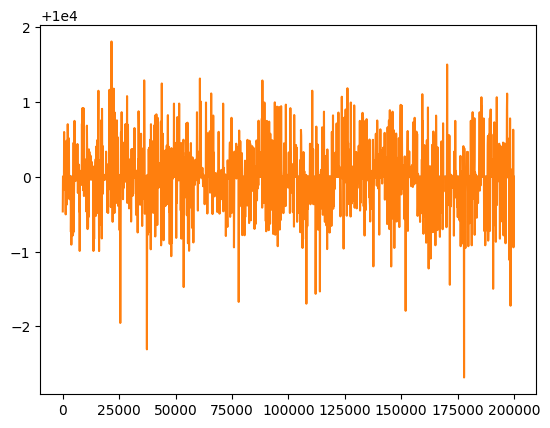

In [122]:
plt.plot(cleaned_theos['RAINFOREST_RESIN']['timestamp'], cleaned_theos['RAINFOREST_RESIN']['imc_theo'])
plt.plot(cleaned_theos['RAINFOREST_RESIN']['timestamp'], cleaned_theos['RAINFOREST_RESIN']['theo_price'])
plt.show()


In [103]:
# Calculate absolute difference from 10000
diff_from_10000 = abs(rainforest_resin_df['imc_theo'] - 10000)

# Filter the DataFrame for rows where the difference is greater than 1e-3 and not NaN
filtered_df = rainforest_resin_df[(diff_from_10000 > 1e-3) & 
                                 (~rainforest_resin_df['imc_theo'].isna())]

# Get the first matching row if any exist
if not filtered_df.empty:
    first_row = filtered_df.iloc[0]
    first_timestamp = first_row['timestamp']
    first_imc_theo = first_row['imc_theo']
    print(f"First timestamp where imc_theo differs from 10000 by more than 0.001: {first_timestamp}")
    print(f"Value of imc_theo at that timestamp: {first_imc_theo}")
    print(f"Difference from 10000: {abs(first_imc_theo - 10000)}")
else:
    print("No rows found where imc_theo differs from 10000 by more than 0.001 and is not NaN")

First timestamp where imc_theo differs from 10000 by more than 0.001: 89700
Value of imc_theo at that timestamp: -inf
Difference from 10000: inf


### Description of All of the Dataframes

1.   market_trade_info_df: average weighted price, total_volume traded of market trades during timestamp
2.   trader_orders_df: price, quantity, type of order (maker or taker), and offset demanded if maker

        Explaining Offset Demanded:
        - If the trader is a maker, the offset demanded is (Edge of Order to Theo) / (Std of Price Return)

3.   trader_data_df: theo, last periods error, expected return, and log return.
4.   position_df: current position at timestamp t
5.   bid_df: bid price, volume
6.   ask_df: ask price, volume
7.   own_trades_df: filled trades with price, quantity, buyer, seller
8.   market_trades_df: market bot trades with price, quantity, buyer, seller
9.   activities_df: includes day, bids, mid_price, and our pnl
10.  trade_history_df: market_trades_df + own_trades_df

In [75]:
# Filter maker orders
maker_orders = trader_orders_df[trader_orders_df['type'] == 'maker'].copy()

# Create separate masks for positive and negative quantity scenarios
buy_trades = own_trades_df[own_trades_df['buyer'] == 'SUBMISSION'].copy()
sell_trades = own_trades_df[own_trades_df['seller'] == 'SUBMISSION'].copy()

# Initialize the quantity_filled column
trader_orders_df['quantity_filled'] = 0

# Reset index to create a column we can use for tracking original positions
maker_orders['original_index'] = maker_orders.index

# Merge for positive quantity orders
buy_merged = maker_orders[maker_orders['quantity'] > 0].merge(
    buy_trades,
    on=['timestamp', 'price', 'symbol'],
    how='left',
    suffixes=('', '_trade')
)

# Merge for negative quantity orders
sell_merged = maker_orders[maker_orders['quantity'] < 0].merge(
    sell_trades,
    on=['timestamp', 'price', 'symbol'],
    how='left',
    suffixes=('', '_trade')
)

# Combine results
filled_orders = pd.concat([buy_merged, sell_merged])

# Group by the original_index and sum the quantities
quantity_filled = filled_orders.groupby('original_index')['quantity_trade'].sum().fillna(0)

# Update the original dataframe using the saved original indices
trader_orders_df.loc[quantity_filled.index, 'quantity_filled'] = quantity_filled

In [76]:
edge_retention_lags = [1, 5]

for edge_retention_lag in edge_retention_lags:

    trader_data_df[f'return_{edge_retention_lag}'] = trader_data_df.groupby('symbol')['log_return'].transform(lambda x: 
        x.rolling(window=edge_retention_lag, min_periods=1).sum().shift(-edge_retention_lag+1)
    )
    
    trader_data_df[f'mtm_theo_{edge_retention_lag}'] = trader_data_df.groupby('symbol')['signal_theo'].transform(lambda x: x.shift(-edge_retention_lag))

### Figuring Out IMC's Theo

1.   At each timestamp, for each product. We have PNL = Position_Product_1 * (Cost_Basis - Theo)

### Figuring Out E[Market Making Theo | Signal, CorrSignalReturn], E[Taking Theo | Signal, CorrSignalReturn]

1.   market_making_return = f(signal, corr)
2.   taking_return = g(signal, corr) s.t. E[trade at taking_theo] = 0

Can I do this with regression?

In [ ]:
symbol_mask = trader_data_df['symbol'] == 'KELP'

y = trader_data_df[symbol_mask][['return']]
X = trader_data_df[symbol_mask][['expected_return']]

model = sm.OLS(y, sm.add_constant(X)).fit()

print(model.summary())


In [ ]:
symbol_mask = market_trade_info_df['symbol'] == 'RAINFOREST_RESIN'
symbol_mask = market_trade_info_df['symbol'] == 'KELP'
plt.plot(market_trade_info_df[symbol_mask]['timestamp'], market_trade_info_df[symbol_mask]['average_weighted_price'])
plt.show()

In [146]:
display(trader_orders_df.head(10))

,timestamp,symbol,price,quantity,type,order_type
0,1200,RAINFOREST_RESIN,9998,1,taker,buy
0,1300,RAINFOREST_RESIN,10002,-1,taker,sell
0,1800,RAINFOREST_RESIN,10002,-1,taker,sell
0,2000,RAINFOREST_RESIN,9998,1,taker,buy
0,2400,KELP,2025,1,taker,buy
0,3100,KELP,2025,5,taker,buy
0,3600,RAINFOREST_RESIN,9998,4,taker,buy
0,3700,RAINFOREST_RESIN,10002,-1,taker,sell
0,4300,RAINFOREST_RESIN,9998,1,taker,buy
0,4300,KELP,2024,5,taker,buy


0.095
0.0855


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,profit_and_loss,weighted_midprice_level_1,weighted_midprice_level_2,weighted_midprice_level_3,log_return_l1,log_return_l2,log_return_l3,realized_vol_lag_5,realized_vol_lag_10,realized_vol_lag_20
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,...,0.0,10003.0,10001.467742,10000.108367,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,...,0.0,2028.5,2027.833333,2027.078125,0.000000,0.000000,0.000000,NaN,NaN,NaN
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,...,0.0,2026.5,2026.958333,2026.958333,-0.000986,-0.000432,-0.000059,NaN,NaN,NaN
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,...,0.0,10000.0,10000.000000,10000.000000,-0.000300,-0.000147,-0.000011,NaN,NaN,NaN
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,...,0.0,10000.0,10000.000000,10000.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


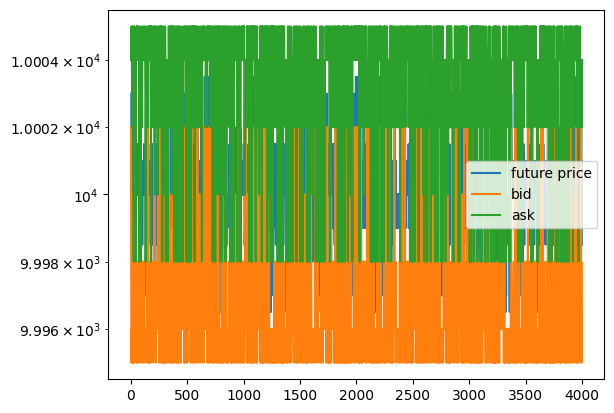

In [79]:
display(df.head())

rainforest_resin_df = df[df['product'] == 'RAINFOREST_RESIN']

plt.plot(rainforest_resin_df['weighted_midprice_level_1'].shift(1),label='future price')
plt.plot(rainforest_resin_df['bid_price_1'],label='bid')
plt.plot(rainforest_resin_df['ask_price_1'],label='ask')
plt.legend()


plt.show()


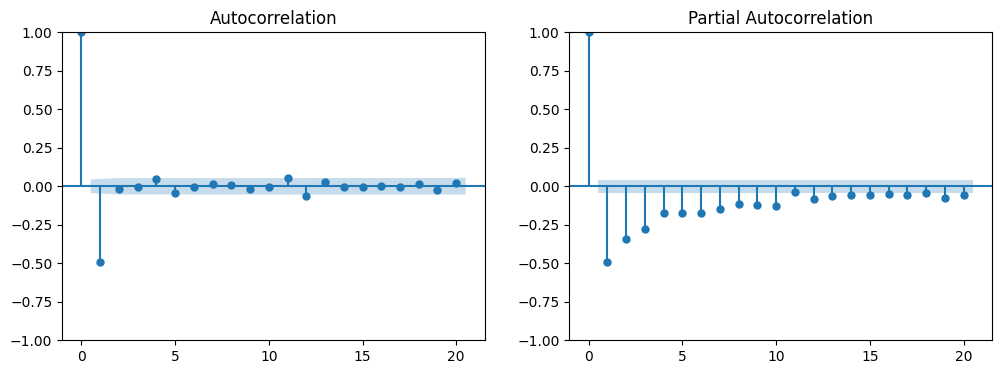

Product: RAINFOREST_RESIN


,Constant,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,R-squared,Alpha
LASSO,5.623049e-09,-0.930029,-0.875076,-0.803050,-0.696894,-0.643830,-0.559838,-0.446183,-0.330899,-0.233128,-0.124904,0.470093,1.291550e-08
RIDGE,5.113575e-09,-0.927789,-0.871235,-0.798151,-0.691477,-0.638435,-0.554766,-0.441721,-0.327388,-0.230759,-0.123715,0.470082,7.742637e-01
OLS,5.795221e-09,-0.930713,-0.876305,-0.804704,-0.698830,-0.645871,-0.561877,-0.448113,-0.332548,-0.234351,-0.125585,0.470094,0.000000e+00


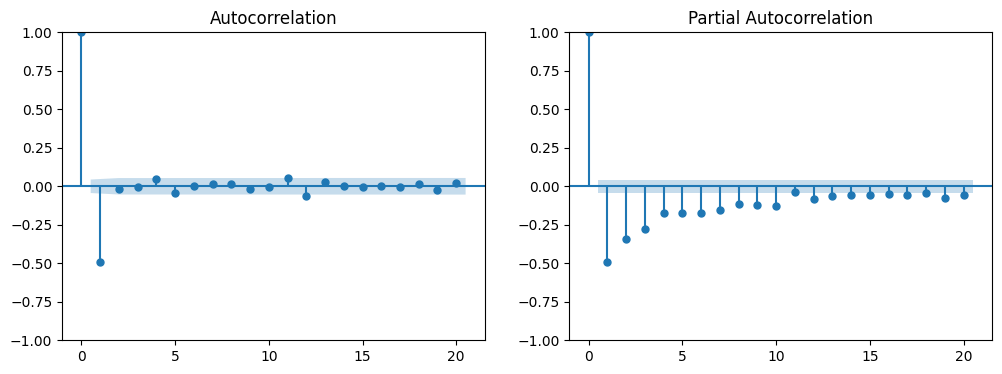

Product: KELP


,Constant,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,R-squared,Alpha
LASSO,-0.000003,-0.608853,-0.363231,-0.224237,-0.101506,-0.051231,-0.023897,0.004717,-0.005073,0.005143,-0.000000,0.278884,0.000001
RIDGE,-0.000003,-0.596634,-0.352916,-0.220101,-0.103575,-0.057420,-0.029780,0.004084,-0.007971,0.006968,-0.000430,0.278656,35.938137
OLS,-0.000003,-0.620009,-0.381059,-0.245287,-0.123107,-0.070816,-0.038314,-0.000726,-0.010228,0.006037,-0.000578,0.279242,0.000000


{'RAINFOREST_RESIN': array([ 5.62304929e-09, -9.30028753e-01, -8.75075778e-01, -8.03049707e-01,
       -6.96893912e-01, -6.43830189e-01, -5.59837861e-01, -4.46182551e-01,
       -3.30899270e-01, -2.33128278e-01, -1.24904479e-01]), 'KELP': array([-2.69462835e-06, -6.08853177e-01, -3.63230711e-01, -2.24236765e-01,
       -1.01506385e-01, -5.12305763e-02, -2.38972164e-02,  4.71738366e-03,
       -5.07273247e-03,  5.14326552e-03, -0.00000000e+00])}
{'RAINFOREST_RESIN': 0.6856335205829088, 'KELP': 0.5280943743162441}


In [44]:
!pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --------------------------------------- 614.7/614.7 kB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------------ --------- 2.1/2.8 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 10.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\marco\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [66]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

def ewma_variance(returns, alpha, init_period=10):

    ewma_var = np.zeros_like(returns)
    for t in range(1, len(returns)):
        ewma_var[t] = (1 - alpha) * ewma_var[t-1] + alpha * returns[t-1]**2  # Lagged variance update
    return ewma_var

init_period = 10
alphas_ewma = [0.9, 0.95, 0.96, 0.97, 0.98, 0.99]

for product in df['product'].unique():
    y = df[df['product'] == product]['log_return_l1'].values

    future_variance = y[init_period:] ** 2

    ewma_predictors = np.zeros((len(future_variance), len(alphas_ewma)))
    for i, alpha_ewma in enumerate(alphas_ewma):
        ewma_var = ewma_variance(y, alpha_ewma)
        predictor = ewma_var[init_period-1:-1]  # Predict variance using previous EWMA (X)
        ewma_predictors[:, i] = predictor

    # Add constant term for intercept
    X = ewma_predictors

    scaler = StandardScaler()

    X_scaled = scaler.fit_transform(X)

    X_mean = scaler.mean_
    X_std = scaler.scale_

    # Fit Lasso with cross-validation to find the best alpha
    lasso = LassoCV(cv=5, alphas=np.logspace(-4, 2, 100), max_iter=10000).fit(X, future_variance)

    # Get R-squared
    r_squared = lasso.score(X, future_variance)

    coef_scaled = lasso.coef_  # LASSO coefficients (for standardized X)
    intercept_scaled = lasso.intercept_

    # Rescale non-constant coefficients
    coef_original = coef_scaled / X_std  # Rescale slopes
    intercept_original = intercept_scaled - np.sum(coef_scaled * X_mean / X_std)  # Adjust intercept

    # Combine intercept and rescaled coefficients
    coef_names = ['Constant'] + [f'Alpha_{alpha_ewma}' for alpha_ewma in alphas_ewma]
    coef_values = np.hstack(([intercept_original], coef_original))

    # Print summary
    coef_df = pd.DataFrame({'Coefficient': coef_names, 'Value': coef_values})
    print(f"Product: {product}")
    print(coef_df.to_string(index=False))
    print(f"R-squared: {r_squared:.4f}\n")



Product: RAINFOREST_RESIN
Coefficient         Value
   Constant  4.427334e-08
  Alpha_0.9 -0.000000e+00
 Alpha_0.95 -0.000000e+00
 Alpha_0.96 -0.000000e+00
 Alpha_0.97 -0.000000e+00
 Alpha_0.98 -0.000000e+00
 Alpha_0.99 -0.000000e+00
R-squared: 0.0000

Product: KELP
Coefficient        Value
   Constant 1.489797e-07
  Alpha_0.9 0.000000e+00
 Alpha_0.95 0.000000e+00
 Alpha_0.96 0.000000e+00
 Alpha_0.97 0.000000e+00
 Alpha_0.98 0.000000e+00
 Alpha_0.99 0.000000e+00
R-squared: 0.0000



NameError: name 'har_all_features' is not defined

# Calculate historical vol
- Add theo columnm which is the true mid price using weighted average using tightest spread and quantity fraction
- Add rolling average of mid prices (window_size=5)
- Add a vol column where we calculate vol based on last 5 entries

In [135]:
import json
import jsonpickle

# Path to your log file
log_file_path = "path/to/your/logfile.log"

# Read the entire content of the log file.
with open(log_file_path, "r") as f:
    log_content = f.read().strip()

# Parse the JSON string from the log file.
data = json.loads(log_content)

# Verify that data is a list with 5 elements.
if not (isinstance(data, list) and len(data) == 5):
    raise ValueError("Log file content is not in the expected format.")

# Unpack the five items.
compressed_state, compressed_orders, conversions, trader_data_str, logger_logs = data

timestamp = compressed_state[0]              # int: the timestamp
state_trader_data = compressed_state[1]        # str: the (truncated) traderData stored in the state
listings = compressed_state[2]                 # list of listings, each a list: [symbol, product, denomination]
order_depths = compressed_state[3]             # dict: {symbol: [buy_orders, sell_orders]}
own_trades = compressed_state[4]               # list of trades, each trade is a list: [symbol, price, quantity, buyer, seller, timestamp]
market_trades = compressed_state[5]            # list of trades, same format as own_trades
position = compressed_state[6]                 # dict: current positions by product
observations = compressed_state[7]             # list: [plainValueObservations, conversionObservations]

# print("Timestamp:", timestamp)

print("Listings:")
for listing in listings:
    # Each listing is [symbol, product, denomination]
    print("  Symbol:", listing[0], "Product:", listing[1], "Denom:", listing[2])

# The compressed orders is a list of orders (each order is [symbol, price, quantity])
# print("Compressed Orders:")
# for order in compressed_orders:
#     print("  Order:", order)

# Conversions is just an integer.
print("Conversions:", conversions)

# The trader data (if encoded via jsonpickle) can be decoded if needed.
# try:
#     decoded_trader_data = jsonpickle.decode(trader_data_str)
#     print("Decoded Trader Data:", decoded_trader_data)
# except Exception as e:
#     print("Trader Data could not be decoded. Raw data:", trader_data_str)

# The logger logs is a simple string.
print("Logger Logs:")
print(logger_logs)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(RAINFOREST_RESIN, 9998, 1)]


ValueError: malformed node or string on line 1: <ast.Name object at 0x000001AE8088B5E0>

In [ ]:
print(log_df[log_df['Symbol'] == 'KELP']['MakerOrders'].value_counts())
print(log_df[log_df['Symbol'] == 'RAINFOREST_RESIN']['MakerOrders'].value_counts())

,Timestamp,Symbol,ExpectedReturn,RealizedReturn,MakerFillPercentage,TakerFillPercentage
1,0,RAINFOREST_RESIN,NaN,0.000000,0.0,0.0
3,100,RAINFOREST_RESIN,0.000000,-0.000267,0.0,0.0
5,200,RAINFOREST_RESIN,0.000132,0.000000,0.0,0.0
7,300,RAINFOREST_RESIN,0.000069,0.000000,0.0,0.0
9,400,RAINFOREST_RESIN,0.000036,0.000000,0.0,0.0


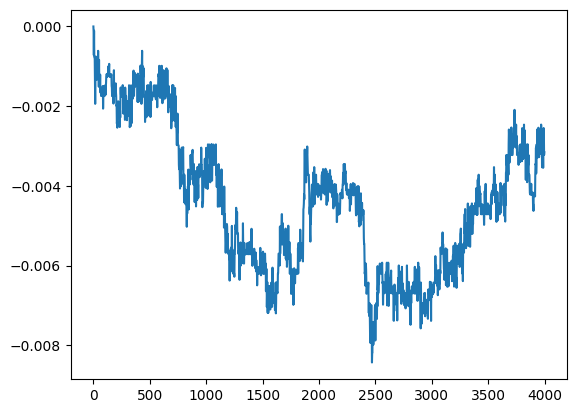

In [68]:
plt.plot(log_df[log_df['Symbol'] == 'KELP']['RealizedReturn'].cumsum())

                                 OLS Regression Results                                
Dep. Variable:         RealizedReturn   R-squared (uncentered):                   0.385
Model:                            OLS   Adj. R-squared (uncentered):              0.385
Method:                 Least Squares   F-statistic:                              1251.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):                   3.18e-213
Time:                        13:03:34   Log-Likelihood:                          14370.
No. Observations:                2000   AIC:                                 -2.874e+04
Df Residuals:                    1999   BIC:                                 -2.873e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

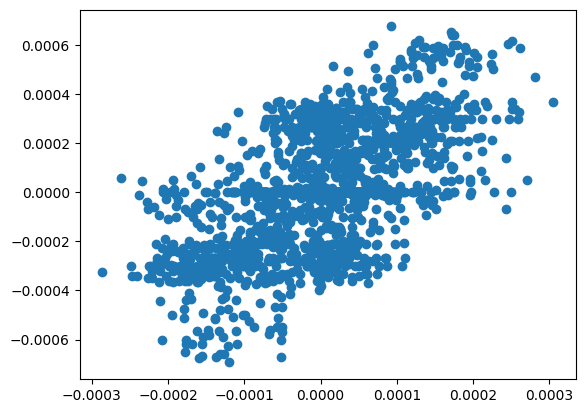

In [26]:

symbol_mask = log_df['Symbol'] == 'RAINFOREST_RESIN'


model = sm.OLS(log_df[symbol_mask]['RealizedReturn'], log_df[symbol_mask]['ExpectedReturn'])
result = model.fit()
print(result.summary())

plt.scatter(log_df[symbol_mask]['ExpectedReturn'], log_df[symbol_mask]['RealizedReturn'])

plt.show()



In [27]:
np.corrcoef(log_df[log_df['Symbol'] == 'KELP']['RealizedReturn'], log_df[log_df['Symbol'] == 'RAINFOREST_RESIN']['RealizedReturn'])

array([[ 1.        , -0.00415965],
       [-0.00415965,  1.        ]])

### Forced Trades

### Summary of PNL Per Product / Strategy

### Multiple Theos - Effect of Bid-Ask Bounce

### Execution Probability of Maker Orders Given Width

### Volatility Regression

### Fill Probabilty / Edge Retention By Order Level Sent

### Forecasting Future Price Given Fills And Past Returns

### Lead / Lag Relationships

### Cross-Product Correlations

### Multi-Period Forecasting